# **Resumen PDS 2P**

Shape img:  (480, 480, 3)
dtype img:  uint8


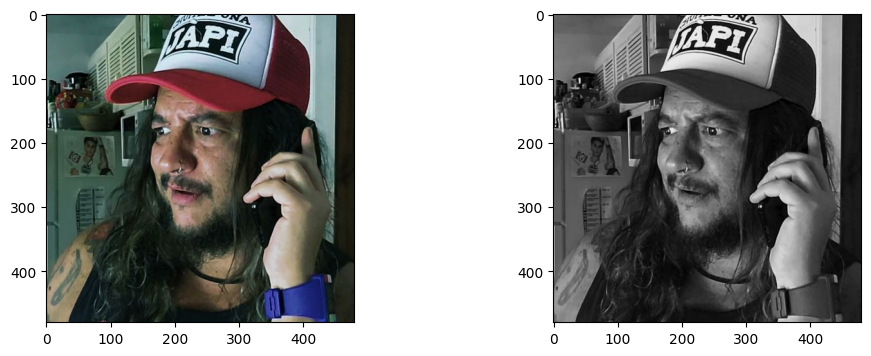

In [126]:
# importamos las librerias necesarias
import cv2 
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy import ndimage, datasets
import scipy.io

# cargamos la imagen a usar
img = cv2.cvtColor(cv2.imread('sape.jpg'), cv2.COLOR_BGR2RGB)
imgsNoise = cv2.imread('saperuido.jpg')
imgsyp = cv2.imread('sapeS&P.jpg')

# mostramos la imagen cargada
print("Shape img: ", img.shape)
print("dtype img: ", img.dtype)

# creamos una variable de la imagen en escala de grises
imgs = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.imshow(img)

plt.subplot(122)
plt.imshow(imgs, cmap='gray')

#plt.imsave("sapeb&n.jpg", imgs, cmap='gray')

plt.show()

---

## **1.1 Transformaciones Geométricas**

Tenemos 3 posibilidades: 
1. Traslacion
2. Rotacion
3. Escalado

### 1.1.1 Traslacion

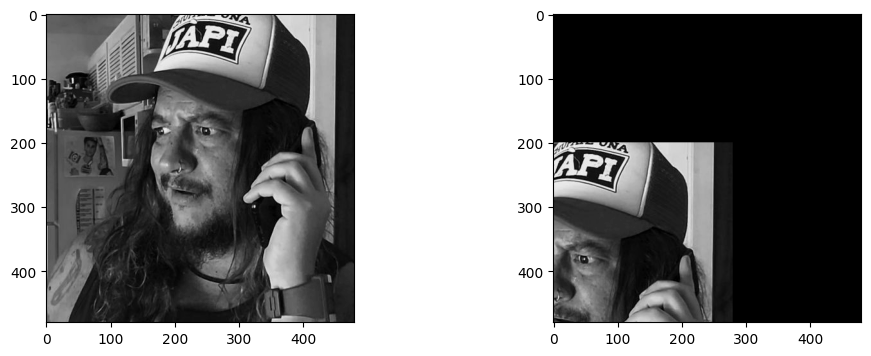

In [103]:
fil, col = imgs.shape

# creamos la matriz de traslacion
tmatrix = np.float32([[1,0,-200],[0,1,200]])
# variar el 200 y -200 para mover la imagen

# ejecutamos la traslacion
imgsTraslado = cv2.warpAffine(imgs, tmatrix, (col,fil))

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.imshow(imgs, cmap='gray')

plt.subplot(122)
plt.imshow(imgsTraslado, cmap='gray')

plt.show()

### 1.1.2 Rotacion

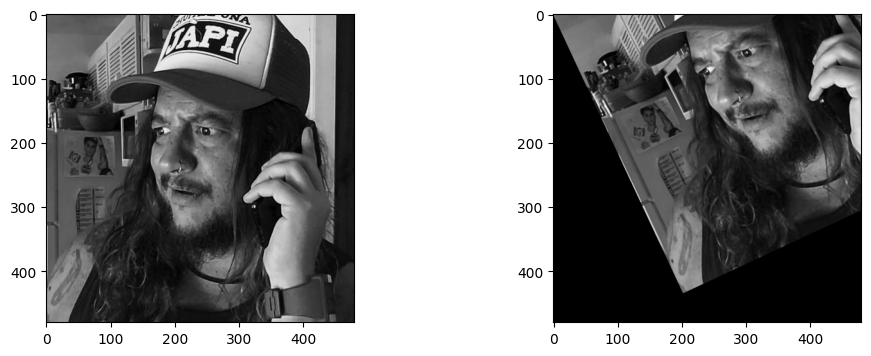

In [104]:
deg = 25 # angulo de rotacion
tmatrix = cv2.getRotationMatrix2D((0,0),deg,1)


imgsRotado = cv2.warpAffine(imgs, tmatrix, (col,fil))

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.imshow(imgs, cmap='gray')

plt.subplot(122)
plt.imshow(imgsRotado, cmap='gray')

plt.show()

### 1.1.3 Escalado

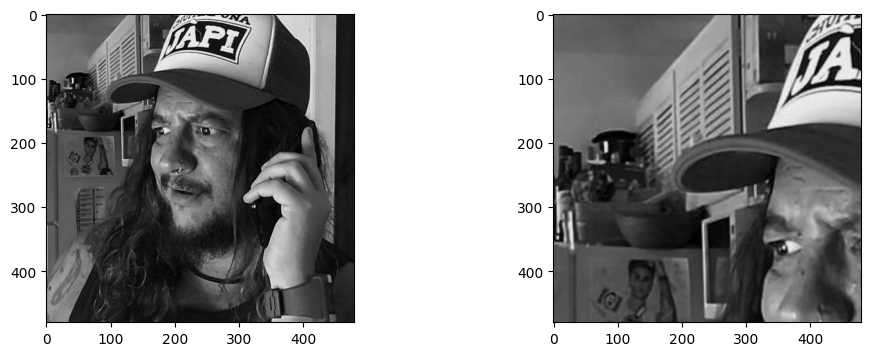

In [105]:
# mismo concepto que rotacion pero con angulo 0
tmatrix = cv2.getRotationMatrix2D((0,0), 0, 2)
# con el ultimo parametro escalamos mas o menos 
# ahora estariamos escalando el doble porque es 2

imgsScale = cv2.warpAffine(imgs, tmatrix, (col, fil))

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.imshow(imgs, cmap='gray')

plt.subplot(122)
plt.imshow(imgsScale, cmap='gray')

plt.show()

## **1.2 Transformaciones de Intensidad**

### 1.2.1 Transformaciones de  Intensidad en Frecuencia
* Filtros Lineales
* Filtros No Lineales (de orden)
* Filtros direccionales (con mascaras)

### 1.2.2 Transformaciones de Intensidad en el Espacio
* Transformaciones punto a punto
* Transformaciones con máscaras/kernels (filtros epeciales o espaciales)

####  1.2.2.1 Transformaciones punto a punto

- Logaritmica
- Negativa
- Potencial 
- Umbralizado

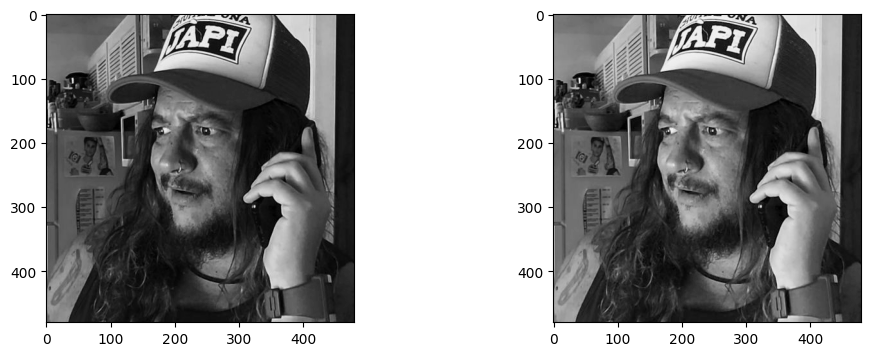

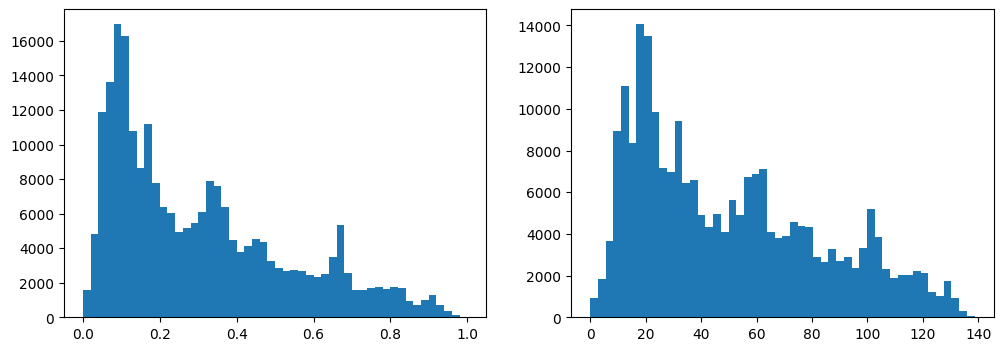

In [106]:
# logaritmica
imgs64 = (imgs/np.amax(imgs)).astype(np.float64) # primero convertimos a float64
c = np.float64(200) # constante c
# print(c)
imgs64log = (c * np.log(1 + abs(imgs64)))

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.imshow(imgs, cmap='gray')

plt.subplot(122)
plt.imshow(imgs64log, cmap='gray')


plt.figure(figsize=(12,4))
plt.subplot(121)
plt.hist(np.ravel(imgs64), bins=50)

plt.subplot(122)
plt.hist(np.ravel(imgs64log), bins=50)

plt.show()

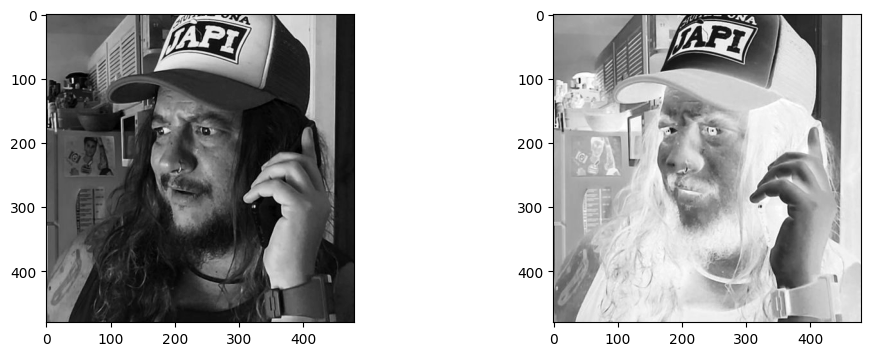

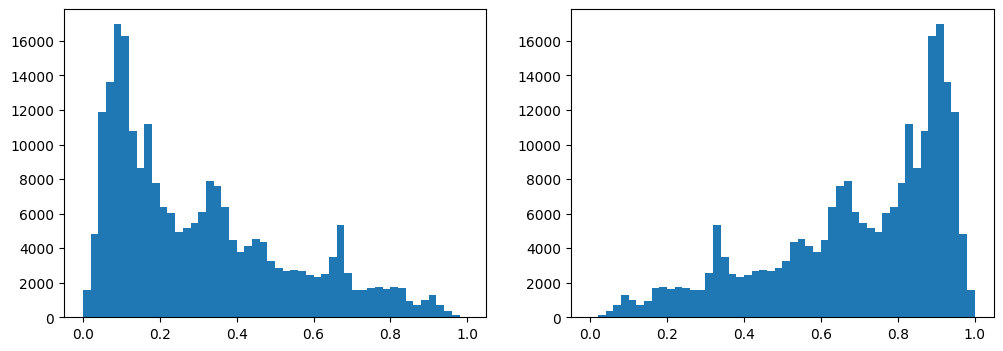

In [107]:
# negativa 
imgs64neg = (1 - imgs64)

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.imshow(imgs, cmap='gray')

plt.subplot(122)
plt.imshow(imgs64neg, cmap='gray')

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.hist(np.ravel(imgs64), bins=50)

plt.subplot(122)
plt.hist(np.ravel(imgs64neg), bins=50)

plt.show()

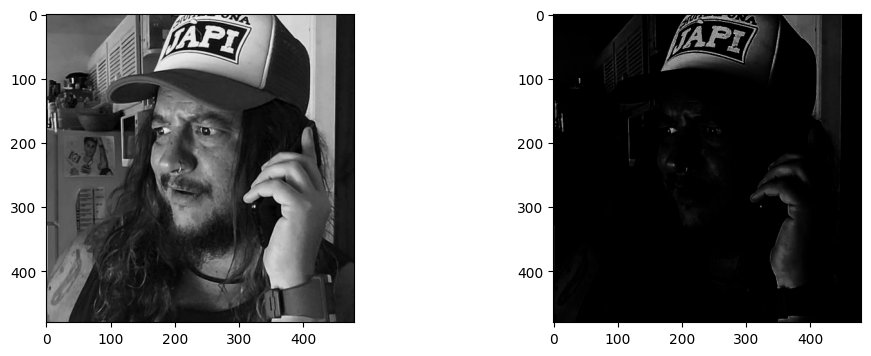

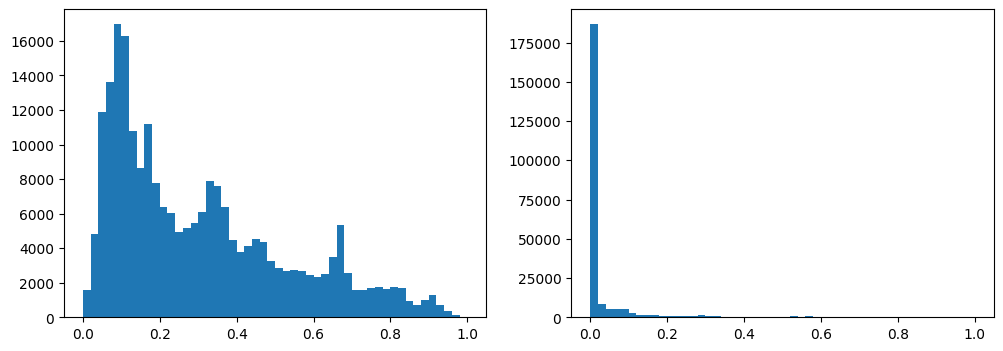

In [108]:
# potencial
gamma = 6
imgs64pot = (imgs64**gamma)

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.imshow(imgs, cmap='gray')

plt.subplot(122)
plt.imshow(imgs64pot, cmap='gray')

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.hist(np.ravel(imgs64), bins=50)

plt.subplot(122)
plt.hist(np.ravel(imgs64pot), bins=50)

plt.show()

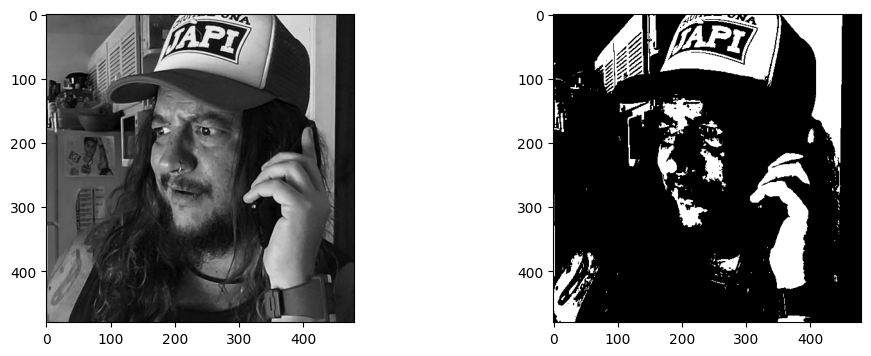

In [109]:
# umbralizado
u = 0.5 # umbral
imgs64bin = (imgs64>=u)

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.imshow(imgs, cmap='gray')

plt.subplot(122)
plt.imshow(imgs64bin, cmap='gray')

plt.show()

#### 1.2.2.2 Transformaciones con máscaras/kernels (filtros epeciales o espaciales)
* Direccionales
* Promediado
* Realce

Otra clasificacion:
- suavizado (filtros pasa bajo - promediado)
- bordes y detalles (filtros pasa alto - diferencia)

Se necesitan dos imagenes:
1. Imagen A 
2. Kernel

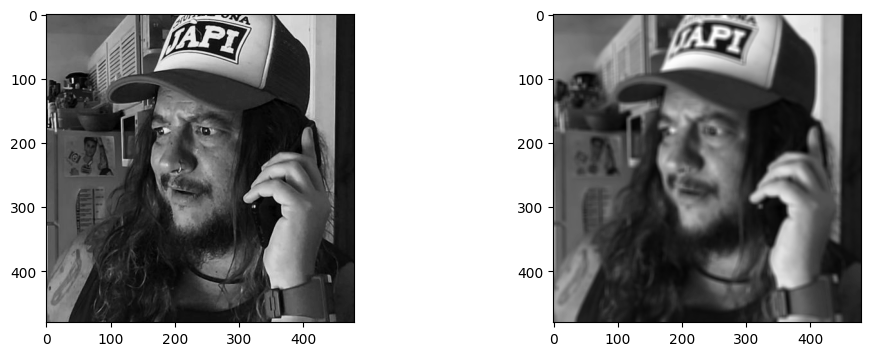

In [110]:
# PROMEDIADOS
def kernel_prom(n):
    return(np.ones((n,n),np.float32)/(n**2))

n = 7 # usar n impar
kern = kernel_prom(n)
#print(kern)
#print(np.sum(kern)) la suma de los elementos es 1

imgsProm = cv2.filter2D(imgs, -1, kern)

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.imshow(imgs, cmap='gray')

plt.subplot(122)
plt.imshow(imgsProm, cmap='gray')

plt.show()

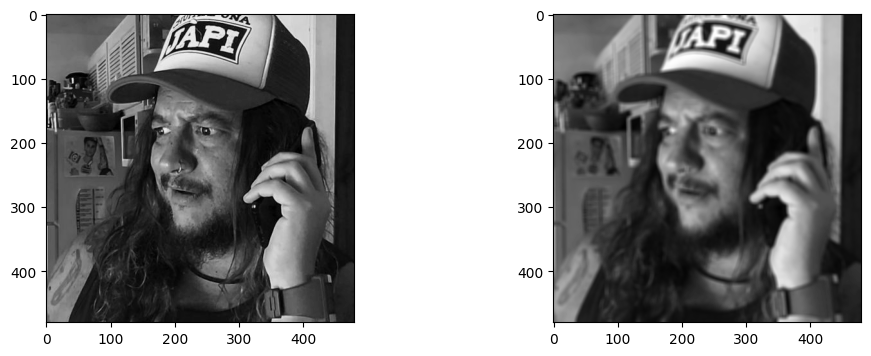

In [111]:
# GAUSSIANO

#Función para generar un kernel Gausiano 2D
def gaussianKernel2D(nfil, ncol, sigmaf, sigmac):
    return(np.dot(cv2.getGaussianKernel(nfil, sigmaf), np.transpose(cv2.getGaussianKernel(ncol, sigmac))))
size = 7
delta = 5
kern = gaussianKernel2D(size, size, delta, delta)
# el 1.5 es la varianza
# print(np.sum(kern)) la suma da casi 1
#print(kern)

imgsGauss = cv2.filter2D(imgs, -1, kern)

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.imshow(imgs, cmap='gray')

plt.subplot(122)
plt.imshow(imgsGauss, cmap='gray')

plt.show()

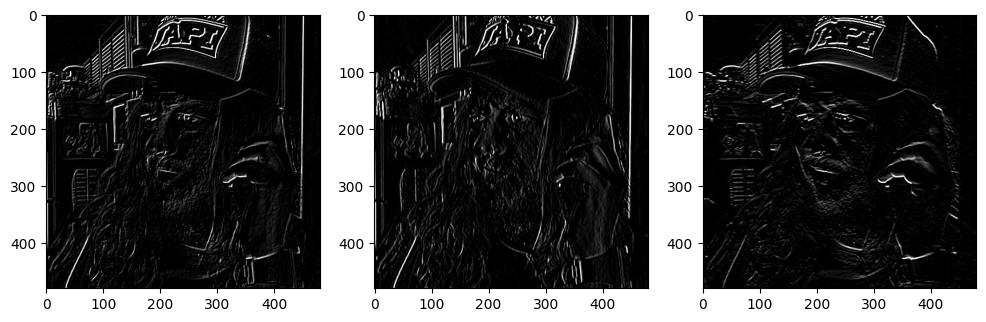

In [112]:
# DETECCION DE BORDES (PASA ALTO) - Prewitt

# diagonales
prewDiag = np.array([[1,1,0],[1,0,-1],[0,-1,-1]]) # la suma de coeficientes debe dar 0
imgsDiag = cv2.filter2D(imgs,-1,prewDiag)

# verticales
prewVert = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])
imgsVert = cv2.filter2D(imgs,-1,prewVert)

# horizontales
prewHoriz = np.transpose(prewVert)
imgsHoriz = cv2.filter2D(imgs,-1,prewHoriz)
#print(prewHoriz)

plt.figure(figsize=(12,4))
plt.subplot(131)
plt.imshow(imgsDiag, cmap='gray')

plt.subplot(132)
plt.imshow(imgsVert, cmap='gray')

plt.subplot(133)
plt.imshow(imgsHoriz, cmap='gray')

plt.show()


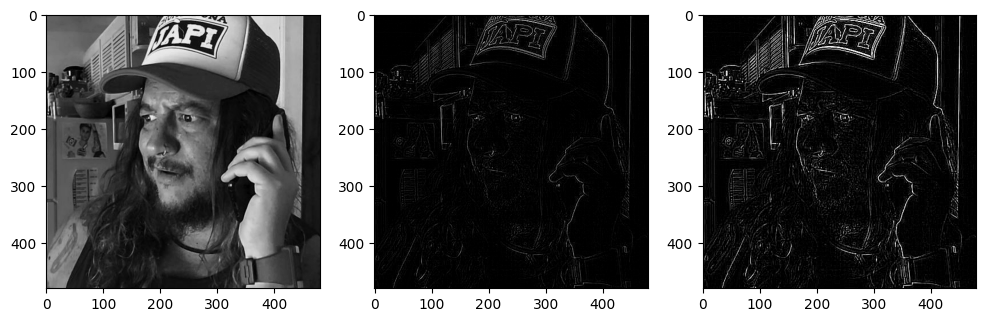

In [114]:
# LAPLACE (REALCE)

laplace1 = np.array([[0,-1,0],[-1,4,-1],[0,-1,0]])
imgsLp1 = cv2.filter2D(imgs,-1,laplace1)

laplace2 = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]]) # kernel de realce
imgsLp2 = cv2.filter2D(imgs,-1,laplace2)

plt.figure(figsize=(12,4))
plt.subplot(131)
plt.imshow(imgs, cmap='gray')

plt.subplot(132)
plt.imshow(imgsLp1, cmap='gray')

plt.subplot(133)
plt.imshow(imgsLp2, cmap='gray')

plt.show()

## 1.2.3 Filtros no lineales
* Mediana (suaviza, robusto a valores extremos)
* Maximo (suaviza, aclara levemente)
* Minimo (suaviza, oscurece levemente)

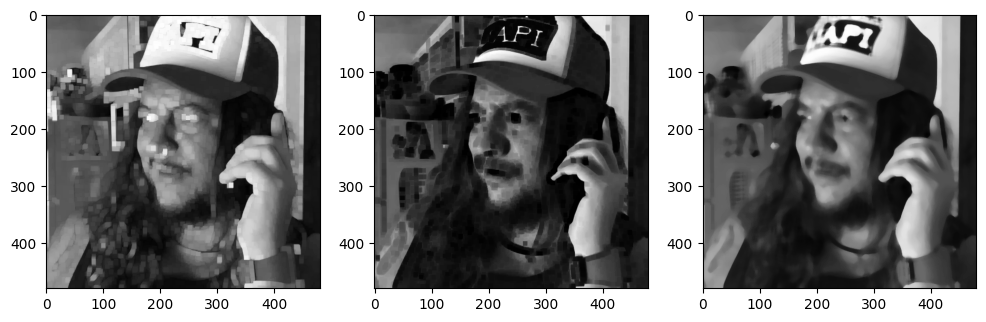

In [119]:
imgsMax = ndimage.maximum_filter(imgs, size=7, mode='nearest')
imgsMin = ndimage.minimum_filter(imgs, size=7, mode='nearest')
imgsMed = ndimage.median_filter(imgs, size=11)
# size -> valor impar, mientras mas grande mas efecto hace

plt.figure(figsize=(12,4))
plt.subplot(131)
plt.imshow(imgsMax, cmap='gray')

plt.subplot(132)
plt.imshow(imgsMin, cmap='gray')

plt.subplot(133)
plt.imshow(imgsMed, cmap='gray')

plt.show() 

---

## **2.1 Ruidos**
Hay dos tipos
- Ruido de distorsion (sistemico)
- Ruido de sal & pimienta

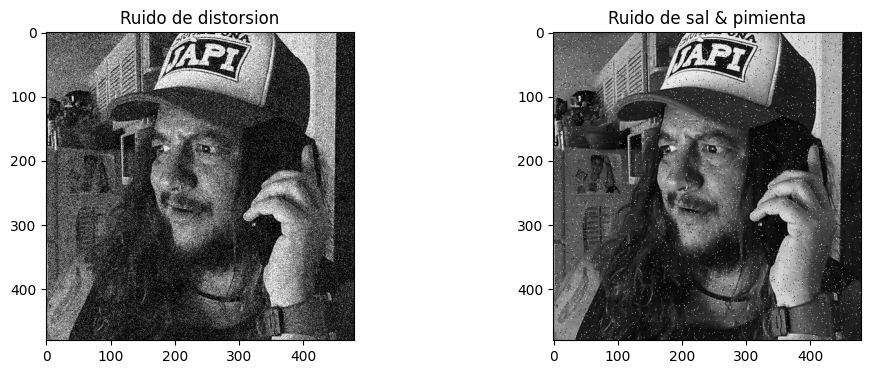

In [128]:
# mostramos la imagen con ruido
plt.figure(figsize=(12,4))

plt.subplot(121)
plt.imshow(imgsNoise)
plt.title("Ruido de distorsion")


plt.subplot(122)
plt.imshow(imgsyp)
plt.title("Ruido de sal & pimienta")

plt.show()

## **2.2 Recuperacion de la senal**

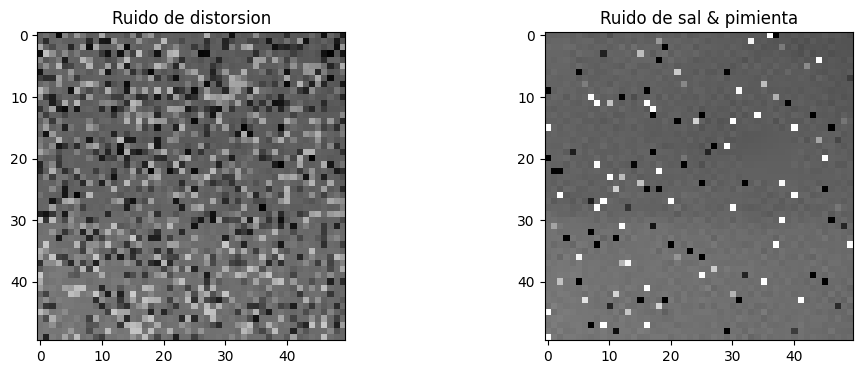

In [129]:
# 1 recortar un pedazo de imagen
rec1 = imgsNoise[0:50,0:50]
rec2 = imgsyp[0:50,0:50]

plt.figure(figsize=(12,4))

plt.subplot(121)
plt.imshow(rec1)
plt.title("Ruido de distorsion")


plt.subplot(122)
plt.imshow(rec2)
plt.title("Ruido de sal & pimienta")

plt.show()

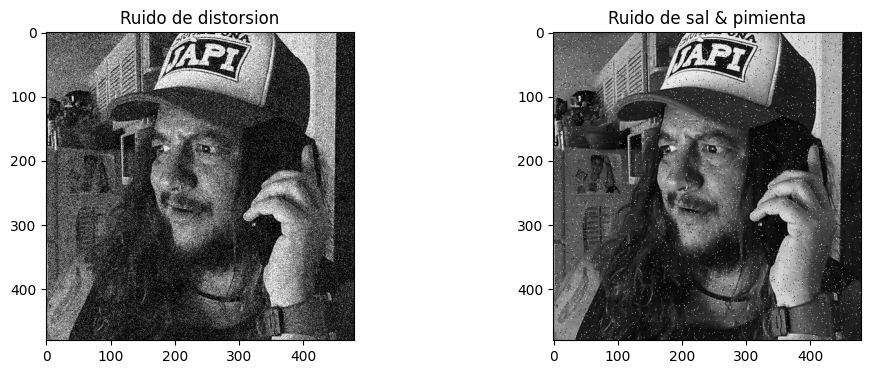

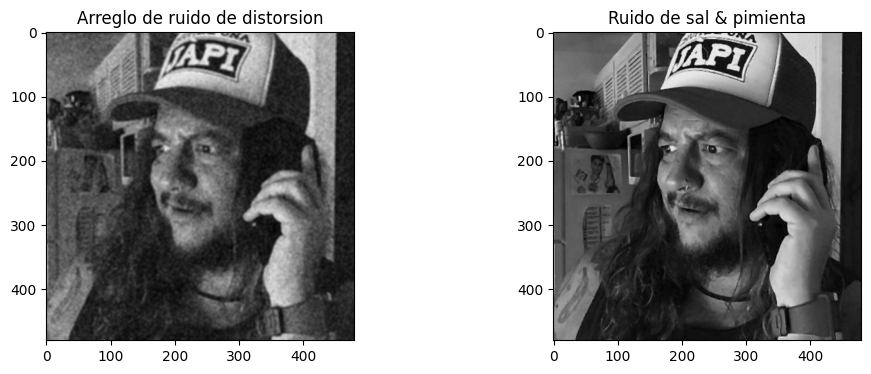

In [144]:
# eliminamos el ruido de distorsion con un filtro gaussiano
n = 5 # dimension del kernel
#fix1 = cv2.medianBlur(imgsNoise,n)
fix1 = cv2.GaussianBlur(imgNoise,(n,n),2,2,0)

# eliminamos el ruido sal y pimiento
n = 3
fix2 = cv2.medianBlur(imgsyp,n)

plt.figure(figsize=(12,4))

plt.subplot(121)
plt.imshow(imgsNoise)
plt.title("Ruido de distorsion")


plt.subplot(122)
plt.imshow(imgsyp)
plt.title("Ruido de sal & pimienta")

plt.figure(figsize=(12,4))

plt.subplot(121)
plt.imshow(fix1)
plt.title("Arreglo de ruido de distorsion")


plt.subplot(122)
plt.imshow(fix2)
plt.title("Ruido de sal & pimienta")

plt.show()